## SVM


In [ ]:
install.packages("caret")
install.packages("e1071")
install.packages("kernlab")
install.packages("dummies")
install.packages("reshape")
install.packages("randomForest")
library(caret)
library(reshape)
library(rpart)
library("e1071")
library(ggplot2)

options(warn=-1)


In [20]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")
source ("cruzada rf binaria.R")
source ("cruzada gbm binaria.R")
source ("cruzada xgboost binaria.R")
source ("cruzada SVM binaria lineal.R")
source ("cruzada SVM binaria polinomial.R")
source ("cruzada SVM binaria RBF.R")


In [5]:
load("data.Rda")
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


## SVM lineal

### Tuneado de parámetro C con Caret

In [33]:
# Caret permite tunear Cset.seed(40)

SVMgrid<-expand.grid(C=c(0.01,0.05,0.1,0.2,0.5,1,2,5,10))
 
control<-trainControl(method = "cv",number=10,savePredictions = "all") 

SVM<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="svmLinear",
            trControl=control,
            tuneGrid=SVMgrid,
            verbose=FALSE)


In [34]:
SVM


Support Vector Machines with Linear Kernel 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  C      Accuracy   Kappa    
   0.01  0.8763923  0.7440028
   0.05  0.8763921  0.7440202
   0.10  0.8763921  0.7440202
   0.20  0.8763921  0.7440202
   0.50  0.8763921  0.7440202
   1.00  0.8763921  0.7440202
   2.00  0.8763921  0.7440202
   5.00  0.8763921  0.7440202
  10.00  0.8763921  0.7440202

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.01.

In [37]:
SVM$results

,C,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,0.8763923,0.7440028,0.008466727,0.01776532
2,0.05,0.8763921,0.7440202,0.008470282,0.01777327
3,0.10,0.8763921,0.7440202,0.008470282,0.01777327
4,0.20,0.8763921,0.7440202,0.008470282,0.01777327
5,0.50,0.8763921,0.7440202,0.008470282,0.01777327
6,1.00,0.8763921,0.7440202,0.008470282,0.01777327
7,2.00,0.8763921,0.7440202,0.008470282,0.01777327
8,5.00,0.8763921,0.7440202,0.008470282,0.01777327
9,10.00,0.8763921,0.7440202,0.008470282,0.01777327


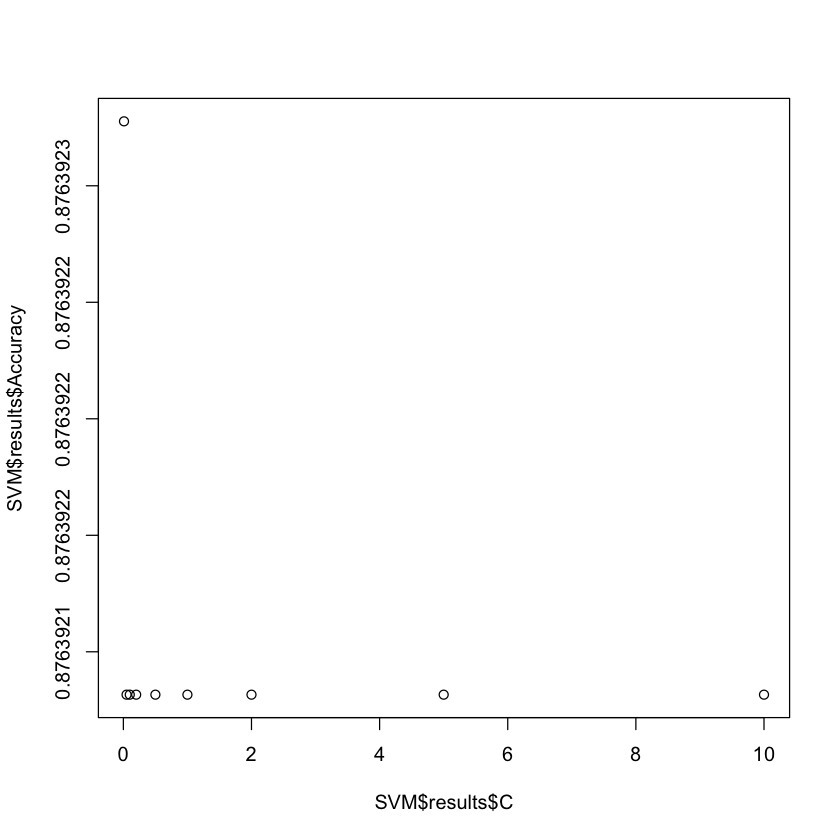

In [38]:
plot(SVM$results$C,SVM$results$Accuracy)

Com podemos ver en el gráfico, efectivamente C=0.01 resulta ser el mejor valor para el parámetro, al maximizar el Accuracy.

#### Aproximación a valores de C obtenidos previamente

In [52]:
# Nos aproximamos con el grid para ver si podemos ajustar más ese valor
set.seed(40)

SVMgrid<-expand.grid(C=c(0.01,0.02,0.03,0.04,0.05,0.06,0.1))
 
control<-trainControl(method = "cv",number=10,savePredictions = "all") 

SVM1<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="svmLinear",
            trControl=control,
            tuneGrid=SVMgrid,
            verbose=FALSE)


In [53]:
SVM1

Support Vector Machines with Linear Kernel 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.01  0.8763923  0.7440028
  0.02  0.8763921  0.7440202
  0.03  0.8763921  0.7440202
  0.04  0.8763921  0.7440202
  0.05  0.8763921  0.7440202
  0.06  0.8763921  0.7440202
  0.10  0.8763921  0.7440202

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.01.

In [54]:
SVM1$results

,C,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,0.8763923,0.7440028,0.008466727,0.01776532
2,0.02,0.8763921,0.7440202,0.008470282,0.01777327
3,0.03,0.8763921,0.7440202,0.008470282,0.01777327
4,0.04,0.8763921,0.7440202,0.008470282,0.01777327
5,0.05,0.8763921,0.7440202,0.008470282,0.01777327
6,0.06,0.8763921,0.7440202,0.008470282,0.01777327
7,0.10,0.8763921,0.7440202,0.008470282,0.01777327


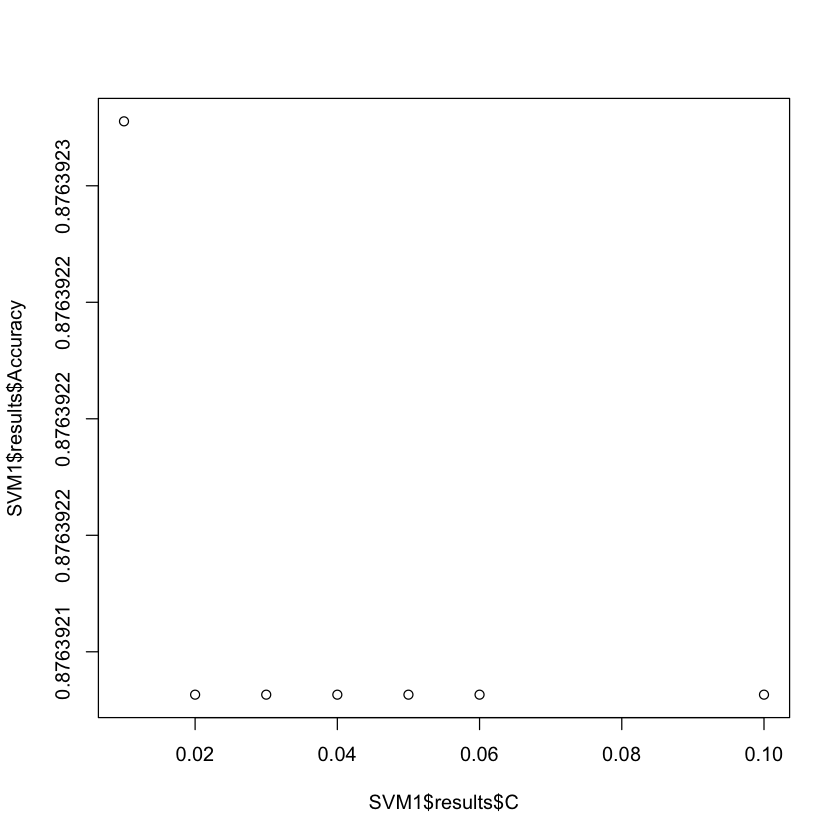

In [55]:
plot(SVM1$results$C,SVM1$results$Accuracy)

El valor de C queda tuneado en C=0.01, pues no ha presentado variaciones al aporximarnos.

## SVM polinomial

In [42]:
#  SVM Polinomial: PARÁMETROS C, degree, scale

In [7]:
SVMgrid<-expand.grid(C=c(0.01,0.02,0.03,0.04,0.05,0.06,0.1),degree=c(2,3),scale=c(0.1,0.5,1,2,5))

control<-trainControl(method = "cv",number=10,savePredictions = "all") 


SVM2<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="svmPoly",
            trControl=control,
            tuneGrid=SVMgrid,
            verbose=TRUE)



In [8]:
SVM2

Support Vector Machines with Polynomial Kernel 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5729, 5731, 5729, 5731, 5731, ... 
Resampling results across tuning parameters:

  C     degree  scale  Accuracy   Kappa    
  0.01  2       0.1    0.8785871  0.7480981
  0.01  2       0.5    0.8770163  0.7452024
  0.01  2       1.0    0.8776445  0.7465856
  0.01  2       2.0    0.8770175  0.7453004
  0.01  2       5.0    0.8763891  0.7439980
  0.01  3       0.1    0.8789016  0.7488260
  0.01  3       0.5    0.8782722  0.7478539
  0.01  3       1.0    0.8779589  0.7472910
  0.01  3       2.0    0.8765443  0.7443742
  0.01  3       5.0    0.8751312  0.7413582
  0.02  2       0.1    0.8789006  0.7487980
  0.02  2       0.5    0.8774880  0.7462389
  0.02  2       1.0    0.8776440  0.7465987
  0.02  2       2.0    0.8763893  0.7439991
  0.02  2       5.0    0.8762321  0.7436820
  0.02  3       0.1   

In [9]:
SVM2$results

,C,degree,scale,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,2,0.1,0.8785871,0.7480981,0.01342576,0.02842676
11,0.02,2,0.1,0.8789006,0.7487980,0.01339927,0.02839319
21,0.03,2,0.1,0.8785866,0.7481480,0.01361357,0.02881816
31,0.04,2,0.1,0.8784299,0.7478513,0.01314169,0.02783713
41,0.05,2,0.1,0.8781159,0.7472385,0.01328483,0.02809470
51,0.06,2,0.1,0.8774877,0.7459922,0.01321966,0.02792654
61,0.10,2,0.1,0.8779592,0.7470411,0.01398471,0.02954092
2,0.01,2,0.5,0.8770163,0.7452024,0.01334704,0.02817098
12,0.02,2,0.5,0.8774880,0.7462389,0.01354526,0.02858234


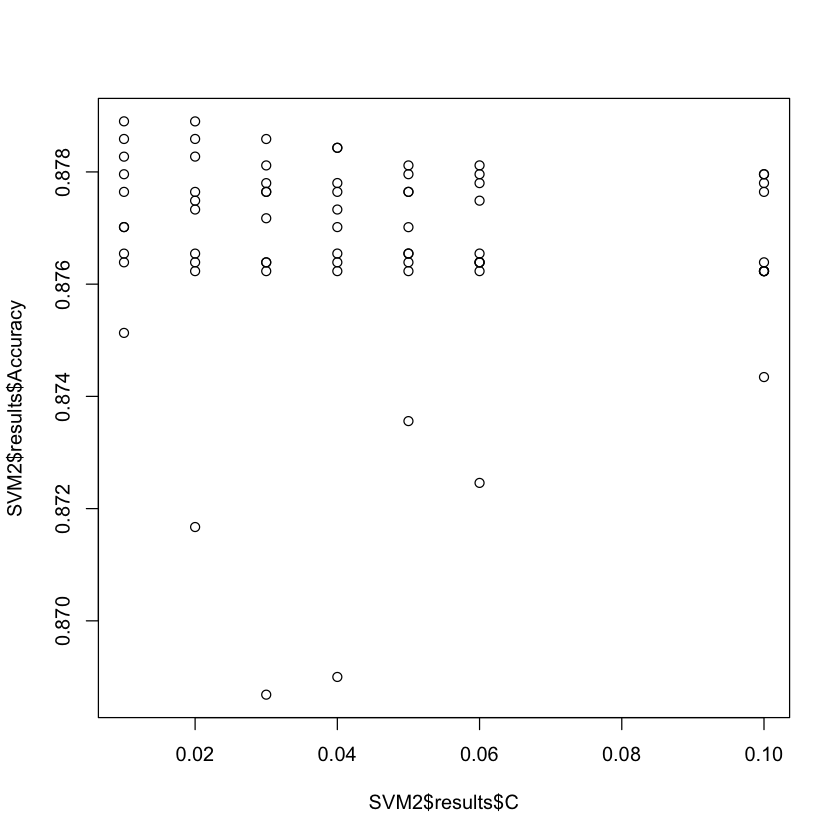

In [10]:
plot(SVM2$results$C,SVM2$results$Accuracy)

In [11]:
dat<-as.data.frame(SVM2$results)
library(ggplot2)

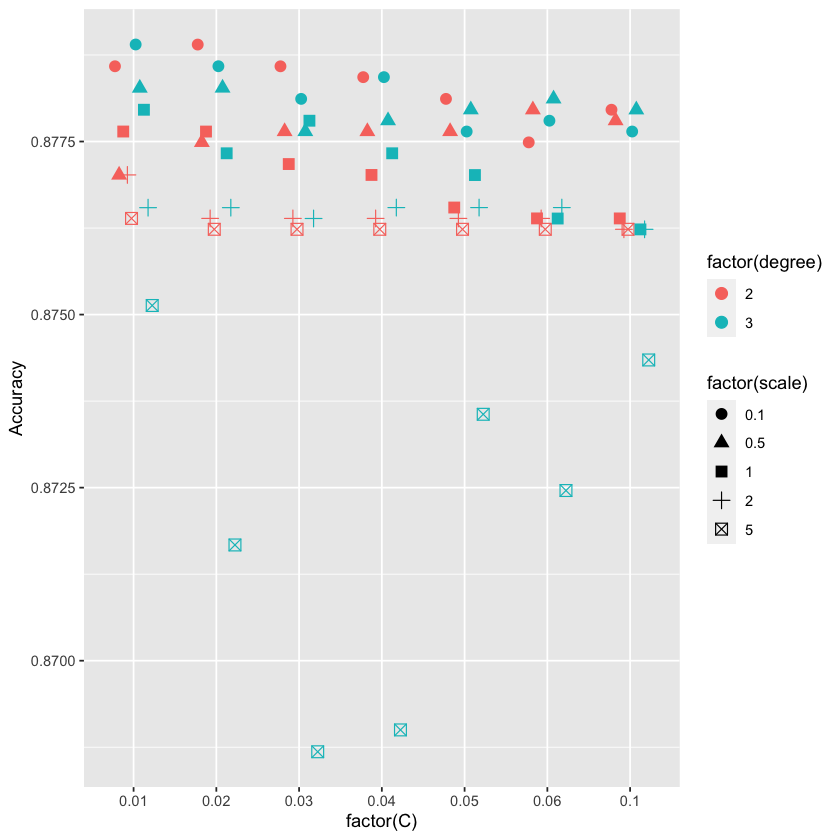

In [12]:
# PLOT DE DOS VARIABLES CATEGÓRICAS, UNA CONTINUA
ggplot(dat, aes(x=factor(C), y=Accuracy, 
 color=factor(degree),pch=factor(scale))) +
  geom_point(position=position_dodge(width=0.5),size=3)

Anlizando el gráfico de 3 componentes, se observan las curvas y en la parte inicial arriba del gráfico se localizan las tendencias más altas de Accuracy que responden degree = 3, scale = 0.1 y C = 0.01.

## SVM Radial

In [14]:
#  SVM RBF: PARÁMETROS C, sigma

SVMgrid<-expand.grid(C=c(0.5,1,2,5,10),
 sigma=c(0.0001,0.005,0.01,0.05))

control<-trainControl(method = "cv",
 number=4,savePredictions = "all") 


SVM3<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="svmRadial",
            trControl=control,
            tuneGrid=SVMgrid,
            verbose=FALSE)


In [15]:
SVM3

Support Vector Machines with Radial Basis Function Kernel 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 4774, 4776, 4776, 4775 
Resampling results across tuning parameters:

  C     sigma  Accuracy   Kappa    
   0.5  1e-04  0.6874510  0.3226358
   0.5  5e-03  0.8784356  0.7480267
   0.5  1e-02  0.8776506  0.7464450
   0.5  5e-02  0.8771801  0.7455843
   1.0  1e-04  0.6920072  0.3324854
   1.0  5e-03  0.8771800  0.7455127
   1.0  1e-02  0.8770229  0.7453203
   1.0  5e-02  0.8774942  0.7463063
   2.0  1e-04  0.8768655  0.7443600
   2.0  5e-03  0.8771798  0.7456367
   2.0  1e-02  0.8768657  0.7449497
   2.0  5e-02  0.8773373  0.7460223
   5.0  1e-04  0.8782787  0.7476922
   5.0  5e-03  0.8768657  0.7449497
   5.0  1e-02  0.8770230  0.7453017
   5.0  5e-02  0.8774945  0.7464073
  10.0  1e-04  0.8784356  0.7480267
  10.0  5e-03  0.8768657  0.7449497
  10.0  1e-02  0.8773373  0.7459553
  10.0  5e-02

In [16]:
dat<-as.data.frame(SVM3$results)
library(ggplot2)

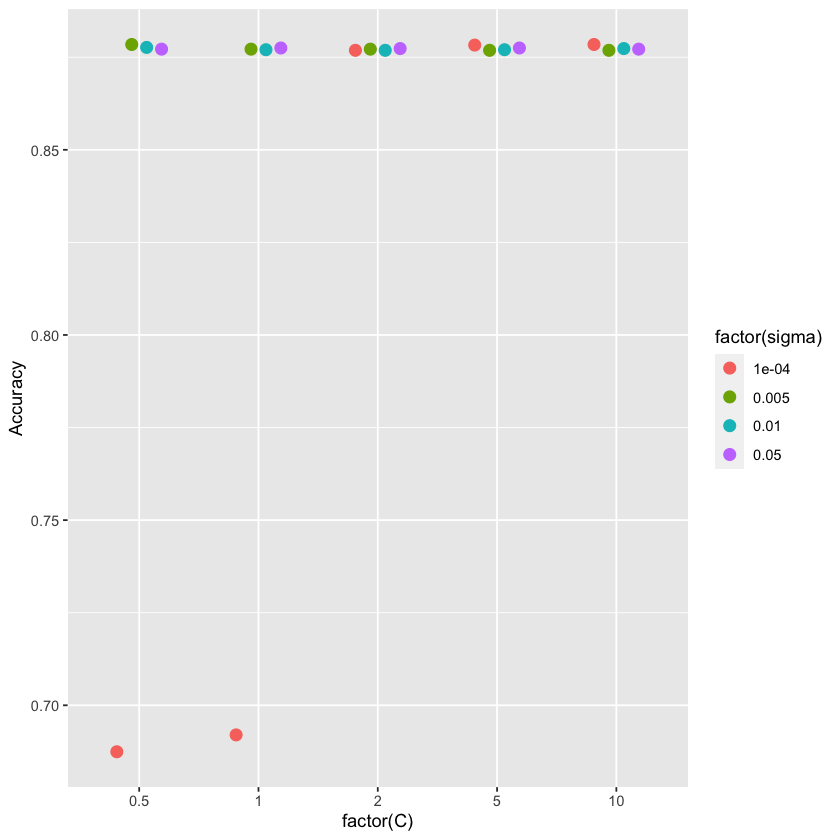

In [18]:
# PLOT DE DOS VARIABLES CATEGÓRICAS, UNA CONTINUA
ggplot(dat, aes(x=factor(C), y=Accuracy, 
 color=factor(sigma))) +
  geom_point(position=position_dodge(width=0.5),size=3)

El factor sigma de valor 0.005 con valores de C cercanos a 0,5 parece que da el mayor valor de Accuraccy y como son funciones que se están repitiendo, considero que pueden tomarse estos valores.

## Comparación con otros modelos del resto de algoritmos

In [26]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"



In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
# Resultado de medias_2

final  value 1153.072431 
converged
  size decay   bag  Accuracy    Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8765013 0.744488 0.01121391 0.02366501

In [28]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


In [31]:
#mejor modelo de bagging
  medias_4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias_4$modelo="bagging"


  mtry  Accuracy    Kappa  AccuracySD   KappaSD
1    9 0.8790632 0.749648 0.007291974 0.0154251


In [32]:
#mejor modelo Random Forest
medias_5<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias_5$modelo="rf"


  mtry  Accuracy     Kappa  AccuracySD   KappaSD
1    3 0.8794873 0.7504862 0.007499957 0.0158603


In [33]:
#mejor modelo GBM
medias_6<-cruzadagbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       n.minobsinnode=5,
                       shrinkage=0.03,
                       n.trees=500,
                       interaction.depth=2)

medias_6$modelo="gbm"

  n.minobsinnode shrinkage n.trees interaction.depth  Accuracy     Kappa
1              5      0.03     500                 2 0.8790319 0.7496926
   AccuracySD    KappaSD
1 0.007446465 0.01571441


In [ ]:
#mejor modelo Xgboost (medias 11)
medias_7<-cruzadaxgbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       min_child_weight=20,
                       eta=0.03,
                       nrounds=150,
                       max_depth=6,
                       gamma=0,
                       colsample_bytree=0.7,
                       subsample=1,
                       alpha=0,
                       lambda=0,
                       lambda_bias=0)



medias_7$modelo="xgbm11"

In [ ]:
# resultados medias_7
  min_child_weight  eta nrounds max_depth gamma colsample_bytree subsample
1               20 0.03     150         6     0              0.7         1
   Accuracy     Kappa  AccuracySD   KappaSD
1 0.8796599 0.7508761 0.007548322 0.0159483

In [21]:
medias_8<-cruzadaSVMbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=5,
                       C=0.01)

medias_8$modelo="SVM"


     C  Accuracy     Kappa AccuracySD    KappaSD
1 0.01 0.8784339 0.7485778 0.01110029 0.02342266


In [22]:
medias_9<-cruzadaSVMbinPoly(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=5,
                       C=0.01,
                       degree=3,
                       scale=0.1)

medias_9$modelo="SVMPoly"

     C degree scale  Accuracy     Kappa AccuracySD    KappaSD
1 0.01      3   0.1 0.8784344 0.7481106  0.0117011 0.02474415


In [23]:
medias_10<-cruzadaSVMbinRBF(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=5,
                       C=0.5,
                       sigma=0.005)

medias_10$modelo="SVMRBF"


    C sigma  Accuracy     Kappa AccuracySD    KappaSD
1 0.5 0.005 0.8784339 0.7485778 0.01110029 0.02342266


In [36]:
union3<-rbind(medias_1,medias_2,medias_3,medias_4,medias_5,medias_6,medias_7,medias_8,medias_9,medias_10)

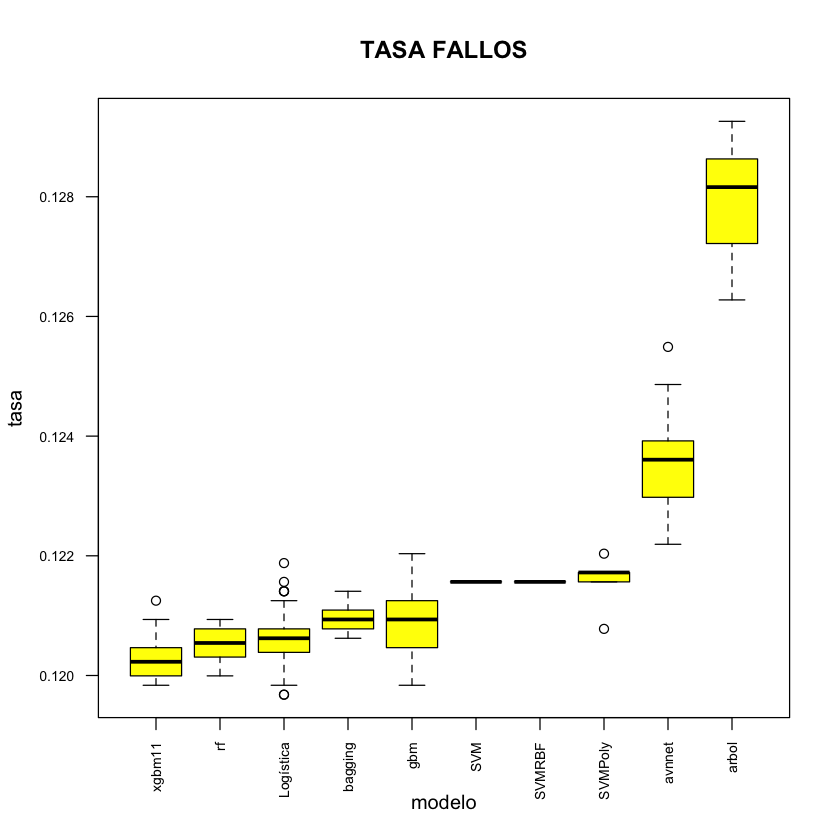

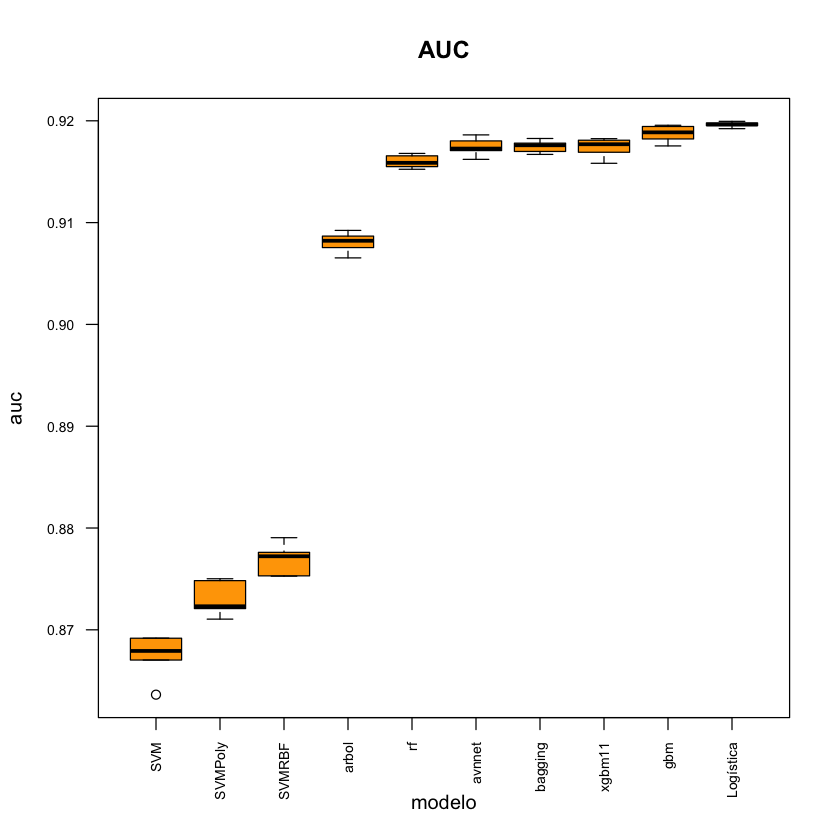

In [37]:
uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,tasa, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,tasa~modelo,col="yellow",main="TASA FALLOS")

uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,auc, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,auc~modelo,col="orange",main="AUC")

### Modelo ganador

Tal y como se aprecia en los gráficos, las tres variantes del SVM, para los datos de nuestro dataset presentan valores infoeriores de AUC y superiores de tasa de fallos en comparación con casi todos los modelos.